# Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, f1_score, accuracy_score, recall_score, cohen_kappa_score
from pprint import pprint
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor, Pool, cv, CatBoostClassifier
import xgboost as xgb
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier, StackingRegressor

#### Функции метрик обучения модели с метриками

In [2]:
def metrics_class(y_test, y_pred):
    metrics = {
        "roc_auc": roc_auc_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "cohen_kappa": cohen_kappa_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
    }
    return metrics

def metrics_reg(y_test, y_pred):
    metrics = {
        "R2": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }
    return metrics

In [3]:
class analyze_model:
            
    def text_representation(self):
        self.text_representation = tree.export_text(self.best_model)
        print(self.text_representation)

    def __init__(self, model, X_train, X_test, y_train, y_test, params=None):

        self.y_test = y_test
        
        if params: 
            model = GridSearchCV(model, params, cv=3, n_jobs=-1)
            model.fit(X_train, y_train)
            self.best_model = model.best_estimator_
            self.best_params = model.best_params_
            self.y_pred = self.best_model.predict(X_test)
        else: 
            model.fit(X_train, y_train)
            self.best_model = model.best_estimator_
            self.y_pred = self.best_model.predict(X_test)
    

## Задание №1

### DecisionTreeRegressor

In [4]:
data_reg = pd.read_csv('Lab3.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Lab3.csv'

In [30]:
data_reg.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180.0,1,0,0,7,1180,0,1955,0,1340,5650
1,1,538000.0,3,2.25,2570.0,2,0,0,7,2170,400,1951,1991,1690,7639
2,2,180000.0,2,1.00,770.0,1,0,0,6,770,0,1933,0,2720,8062
3,3,604000.0,4,3.00,1960.0,1,0,0,7,1050,910,1965,0,1360,5000
4,4,510000.0,3,2.00,1680.0,1,0,0,8,1680,0,1987,0,1800,7503


In [31]:
X_reg = data_reg.drop(['price', 'Unnamed: 0'], axis=1)
y_reg = data_reg['price']

In [32]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=15)

In [33]:
scaler=StandardScaler()
scaler.fit(X_train_reg)
X_train_reg = scaler.transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [34]:
params_grid = {
    'max_depth' : [2, 4, 7, 10, 15],
    'min_samples_split' : [2, 4, 6, 8]
}

In [35]:
reg = DecisionTreeRegressor()

In [36]:
reg_result = analyze_model(reg, X_train_reg, X_test_reg, y_train_reg, y_test_reg, params_grid)

In [37]:
reg_result.best_model

DecisionTreeRegressor(max_depth=7, min_samples_split=8)

In [38]:
metrics_reg(reg_result.y_test, reg_result.y_pred)

{'R2': 0.63079316695551, 'MSE': 37609174546.12572, 'RMSE': 193930.849908223}

In [39]:
reg_result.text_representation()

|--- feature_6 <= 0.76
|   |--- feature_2 <= -0.01
|   |   |--- feature_6 <= -0.12
|   |   |   |--- feature_12 <= -0.31
|   |   |   |   |--- feature_9 <= -1.00
|   |   |   |   |   |--- feature_6 <= -1.00
|   |   |   |   |   |   |--- feature_11 <= -1.04
|   |   |   |   |   |   |   |--- value: [320104.10]
|   |   |   |   |   |   |--- feature_11 >  -1.04
|   |   |   |   |   |   |   |--- value: [405076.05]
|   |   |   |   |   |--- feature_6 >  -1.00
|   |   |   |   |   |   |--- feature_2 <= -0.84
|   |   |   |   |   |   |   |--- value: [482056.07]
|   |   |   |   |   |   |--- feature_2 >  -0.84
|   |   |   |   |   |   |   |--- value: [577085.73]
|   |   |   |   |--- feature_9 >  -1.00
|   |   |   |   |   |--- feature_8 <= 0.03
|   |   |   |   |   |   |--- feature_6 <= -1.00
|   |   |   |   |   |   |   |--- value: [274147.09]
|   |   |   |   |   |   |--- feature_6 >  -1.00
|   |   |   |   |   |   |   |--- value: [360113.60]
|   |   |   |   |   |--- feature_8 >  0.03
|   |   |   |   |   |   

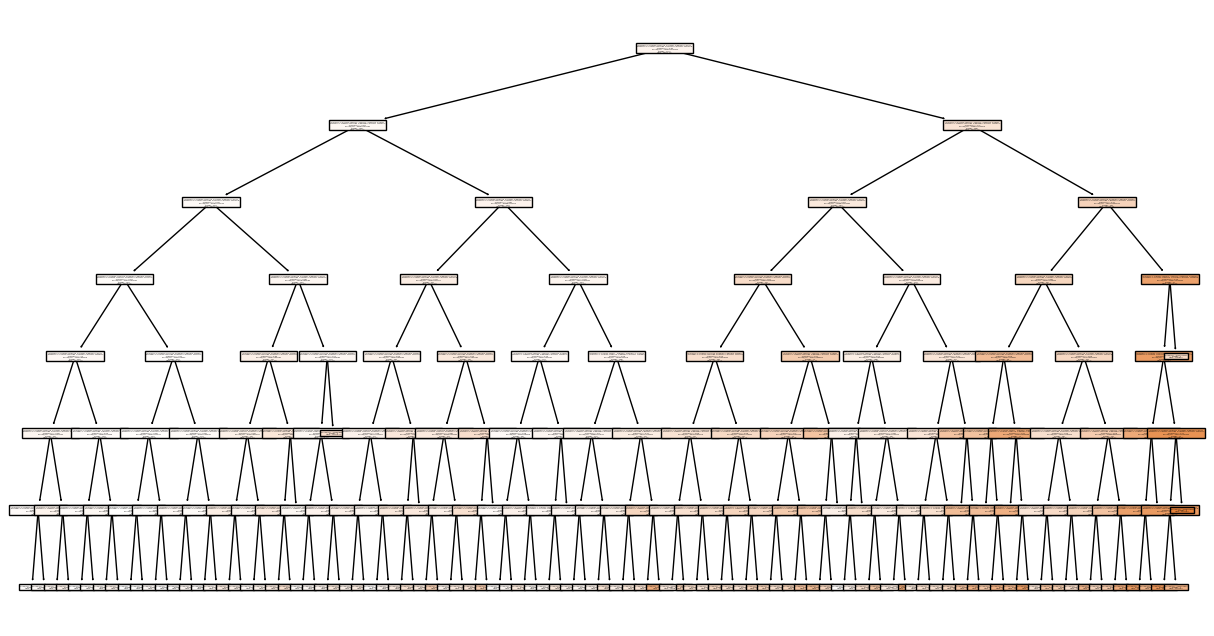

In [60]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(reg_result.best_model, feature_names=X_train_reg, filled=True)

### DecisionTreeClassifier

In [5]:
data_class = pd.read_csv('Lab4.csv')

In [6]:
data_class.head()

,Unnamed: 0,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,0,175.00,0,0,0,500,500,0,0,4000,4000,0,0,0,5,5
1,1,156.03,0,0,0,500,500,400,300,600,650,0,0,1,5,5
2,2,96.03,0,0,0,391,400,294,200,750,500,0,0,1,4,4
3,3,76.03,0,0,0,391,400,294,200,750,500,0,0,1,4,4
4,4,174.97,1,0,0,500,500,192,0,18350,10750,0,0,1,5,5


In [7]:
X_class = data_class.drop(['bomb_planted', 'Unnamed: 0'], axis=1)
y_class = data_class['bomb_planted']

In [8]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=15)

In [9]:
scaler=StandardScaler()
scaler.fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

In [10]:
print(f'1: {sum(y_train_class == 1)}')
print(f'0: {sum(y_train_class == 0)}')

1: 10607
0: 78983


In [11]:
nm = NearMiss()
X_train_class, y_train_class = nm.fit_resample(X_train_class, y_train_class.ravel())

In [12]:
print(f'1: {sum(y_train_class == 1)}')
print(f'0: {sum(y_train_class == 0)}')

1: 10607
0: 10607


In [13]:
classif = DecisionTreeClassifier()

In [14]:
params_grid = {
    'max_depth' : [2, 4, 7, 10, 15],
    'min_samples_split' : [2, 4, 6, 8]
}

In [51]:
classif_result = analyze_model(classif, X_train_class, X_test_class, y_train_class, y_test_class, params_grid)

In [52]:
classif_result.best_model

DecisionTreeClassifier(max_depth=7, min_samples_split=6)

In [53]:
metrics_class(classif_result.y_test, classif_result.y_pred)

{'roc_auc': 0.9716770549428493,
 'accuracy': 0.9774533440485758,
 'recall': 0.9641358260206028,
 'cohen_kappa': 0.896333578182194,
 'f1': 0.9091563230796905}

In [54]:
classif_result.text_representation()

|--- feature_0 <= -1.01
|   |--- feature_0 <= -1.12
|   |   |--- feature_0 <= -1.49
|   |   |   |--- feature_0 <= -1.49
|   |   |   |   |--- feature_13 <= -1.38
|   |   |   |   |   |--- feature_3 <= -1.75
|   |   |   |   |   |   |--- feature_6 <= -1.53
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  -1.53
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  -1.75
|   |   |   |   |   |   |--- feature_13 <= -2.97
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_13 >  -2.97
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  -1.38
|   |   |   |   |   |--- feature_0 <= -1.65
|   |   |   |   |   |   |--- feature_8 <= 1.11
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  1.11
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -1.65
|   |   |   |   |   |   |--- feature_0 <= -1.64
|   |   |   |   |   |   |   |--- c

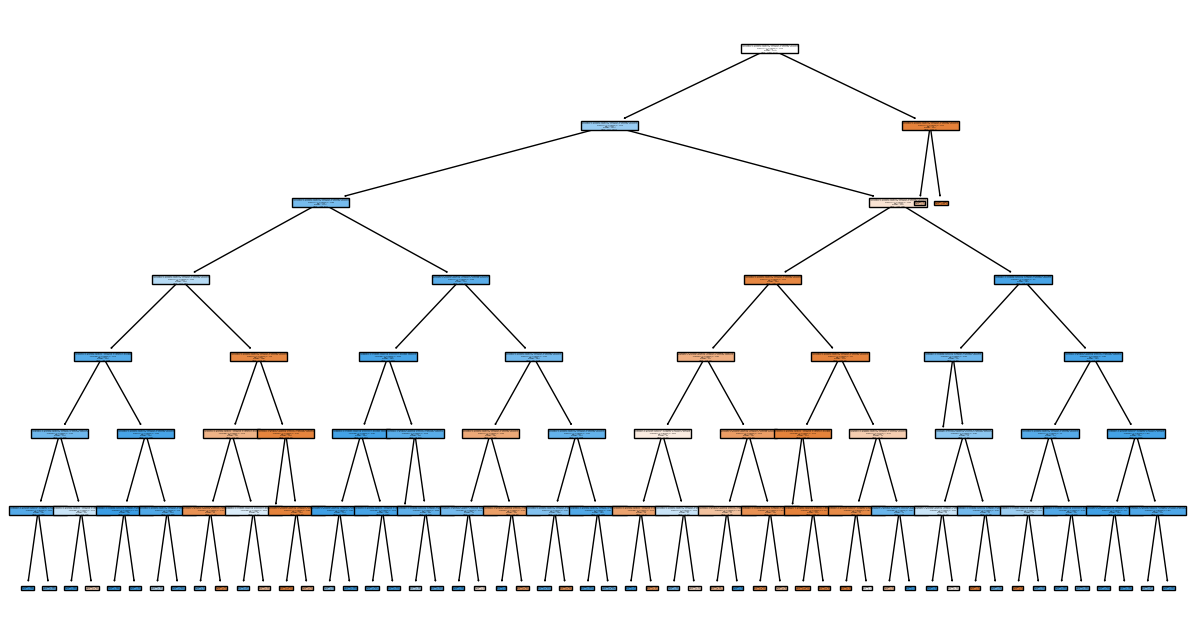

In [61]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(classif_result.best_model, feature_names=X_train_class, filled=True)

По выводу видно, насколько глубоко модель проникает в датасет, для наиболее качественного анализа.

### PyCaret

In [17]:
#!pip install pycaret

In [31]:
from pycaret.regression import *
def pycaret_regressor_example():
    ex = setup(data_reg, target='price')
    compare_models()
pycaret_regressor_example()

,Description,Value
0,Session id,3575
1,Target,price
2,Target type,Regression
3,Original data shape,"(21399, 15)"
4,Transformed data shape,"(21399, 15)"
5,Transformed train set shape,"(14979, 15)"
6,Transformed test set shape,"(6420, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,111467.2032,27083244779.8532,164429.0781,0.7429,0.2819,0.2375,3.4720
lightgbm,Light Gradient Boosting Machine,113487.8187,27823529751.7956,166682.1933,0.7358,0.2850,0.2418,0.4420
et,Extra Trees Regressor,113669.6938,28684518638.9729,169236.9829,0.7277,0.2898,0.2426,0.8880
gbr,Gradient Boosting Regressor,117621.7067,29085989607.4888,170432.9147,0.7240,0.2939,0.2525,0.5260
rf,Random Forest Regressor,113546.7556,29339758890.8759,171118.4927,0.7216,0.2862,0.2396,2.3350
xgboost,Extreme Gradient Boosting,115758.7281,30056616960.0000,173198.0375,0.7147,0.2905,0.2435,0.0860
ridge,Ridge Regression,132166.2445,38497825439.4710,196152.6004,0.6346,0.3550,0.2821,0.0100
lasso,Lasso Regression,132167.5065,38498959965.0534,196155.7432,0.6345,0.3552,0.2821,0.1920
lr,Linear Regression,132167.5768,38498970167.0114,196155.7793,0.6345,0.3552,0.2821,0.3860
br,Bayesian Ridge,132168.8935,38501479740.8265,196161.2376,0.6345,0.3548,0.2821,0.0140


In [33]:
from pycaret.classification import *
def pycaret_classifier_example():
    ex = setup(data_class, target='bomb_planted')
    compare_models()
pycaret_classifier_example()

,Description,Value
0,Session id,7680
1,Target,bomb_planted
2,Target type,Binary
3,Original data shape,"(111988, 16)"
4,Transformed data shape,"(111988, 16)"
5,Transformed train set shape,"(78391, 16)"
6,Transformed test set shape,"(33597, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9814,0.9961,0.9503,0.8985,0.9236,0.9131,0.9136,1.9910
gbc,Gradient Boosting Classifier,0.9811,0.9961,0.9513,0.8956,0.9226,0.9119,0.9124,15.9420
catboost,CatBoost Classifier,0.9811,0.9962,0.9481,0.8979,0.9223,0.9115,0.9120,39.0180
xgboost,Extreme Gradient Boosting,0.9788,0.9956,0.9338,0.8918,0.9123,0.9002,0.9006,1.3760
ada,Ada Boost Classifier,0.9782,0.9952,0.9433,0.8807,0.9109,0.8985,0.8992,4.6150
rf,Random Forest Classifier,0.9751,0.9938,0.9030,0.8879,0.8953,0.8812,0.8812,9.3530
dt,Decision Tree Classifier,0.9718,0.9301,0.8755,0.8844,0.8799,0.8639,0.8639,0.3950
et,Extra Trees Classifier,0.9542,0.9837,0.7853,0.8196,0.8020,0.7762,0.7764,4.1230
lr,Logistic Regression,0.9202,0.9609,0.4984,0.7413,0.5958,0.5535,0.5670,1.8690
ridge,Ridge Classifier,0.9164,0.0000,0.5012,0.7054,0.5859,0.5408,0.5507,0.1650


Наилучший результат для регрессии показала модель *CatBoost Regressor*, для классификации - *Light Gradient Boosting Machine*

## Задание №2

### StackingRegressor

In [13]:
base_models = [
    ('linear_reg', LinearRegression()),
    ('decision_tree', DecisionTreeRegressor()),
    ('polymialfeatures', CatBoostRegressor())
]

In [14]:
meta_model = RandomForestRegressor()
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_regressor.fit(X_train_reg, y_train_reg)

Learning rate set to 0.064131
0:	learn: 319268.1368919	total: 180ms	remaining: 3m
1:	learn: 308592.1008467	total: 195ms	remaining: 1m 37s
2:	learn: 298697.4755130	total: 209ms	remaining: 1m 9s
3:	learn: 289533.2321408	total: 218ms	remaining: 54.3s
4:	learn: 280975.0983135	total: 227ms	remaining: 45.2s
5:	learn: 273377.6579724	total: 236ms	remaining: 39.1s
6:	learn: 266200.0267893	total: 245ms	remaining: 34.7s
7:	learn: 259519.5770106	total: 253ms	remaining: 31.3s
8:	learn: 253447.7312403	total: 261ms	remaining: 28.8s
9:	learn: 247654.9893215	total: 270ms	remaining: 26.7s
10:	learn: 242218.9938584	total: 278ms	remaining: 25s
11:	learn: 237462.8440165	total: 294ms	remaining: 24.2s
12:	learn: 232803.3027459	total: 313ms	remaining: 23.7s
13:	learn: 228565.4829512	total: 330ms	remaining: 23.3s
14:	learn: 224590.2767522	total: 348ms	remaining: 22.9s
15:	learn: 220894.8719432	total: 361ms	remaining: 22.2s
16:	learn: 217542.0073643	total: 372ms	remaining: 21.5s
17:	learn: 214566.4736575	total:

StackingRegressor(estimators=[('linear_reg', LinearRegression()),
                              ('decision_tree', DecisionTreeRegressor()),
                              ('polymialfeatures',
                               <catboost.core.CatBoostRegressor object at 0x000001AF9AB15A90>)],
                  final_estimator=RandomForestRegressor())

In [15]:
metrics_reg(stacking_regressor.predict(X_test_reg), y_test_reg)

{'R2': 0.647597271870368, 'MSE': 28400156348.80834, 'RMSE': 168523.45934263378}

### StackingClassifier

In [15]:
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_reg', LogisticRegression()),
    ('naive_bayesa', GaussianNB())
]

In [16]:
meta_classifier = RandomForestClassifier()
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(X_train_class, y_train_class)

StackingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                               ('logistic_reg', LogisticRegression()),
                               ('naive_bayesa', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [18]:
import pickle

with open("C:\ML\ML2023\ML_RGR\Models\Stacking.pickle", "wb") as f:
    pickle.dump(stacking_classifier, f)

In [34]:
metrics_class(stacking_classifier.predict(X_test_class), y_test_class)

{'roc_auc': 0.902988952341933,
 'accuracy': 0.96468434681668,
 'recall': 0.8201539538138558,
 'cohen_kappa': 0.8355549438602368,
 'f1': 0.8556305895236356}

### BaggingRegressor

In [22]:
param_grid = {
     "n_estimators": [10, 50, 100, 300]
}

In [36]:
reg_result = analyze_model(BaggingRegressor(DecisionTreeRegressor(), random_state=17), X_train_reg, X_test_reg, y_train_reg, y_test_reg, param_grid)

In [37]:
reg_result.best_model

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=300,
                 random_state=17)

In [38]:
print(metrics_reg(reg_result.y_test, reg_result.y_pred))

{'R2': 0.7448483919445055, 'MSE': 25990963612.33219, 'RMSE': 161217.13188222953}


### BaggingClassifier

In [ ]:
param_grid = {
     "n_estimators": [10, 50, 100, 300]
}

In [1]:
class_result = analyze_model(
    BaggingClassifier(DecisionTreeClassifier(), random_state=17),
    X_train_class,
    X_test_class,
    y_train_class,
    y_test_class,
    param_grid,
)

NameError: name 'analyze_model' is not defined

In [24]:
class_result.best_model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=17)

In [25]:
import pickle

with open("C:\ML\ML2023\ML_RGR\Models\Bagging.pickle", "wb") as f:
    pickle.dump(class_result.best_model, f)

In [49]:
print(metrics_class(class_result.y_test, class_result.y_pred))

{'roc_auc': 0.973302012209119, 'accuracy': 0.9785695151352799, 'recall': 0.9664250286150324, 'cohen_kappa': 0.9012637549473783, 'f1': 0.9134511359538405}


### GradientBoostingRegressor

In [26]:
param_grid = {
    'n_estimators':[50, 100, 200, 400],
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'max_depth':[5, 10, 15],
}

In [18]:
reg_result = analyze_model(GradientBoostingRegressor(random_state=17), X_train_reg, X_test_reg, y_train_reg, y_test_reg, param_grid)

In [19]:
reg_result.best_model

GradientBoostingRegressor(max_depth=5, random_state=17)

In [20]:
print(metrics_reg(reg_result.y_test, reg_result.y_pred))

{'R2': 0.7387245238972842, 'MSE': 26614770112.299206, 'RMSE': 163140.33870351993}


### GradientBoostingClassifier

In [ ]:
param_grid = {
    'n_estimators':[50, 100, 200, 400],
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'max_depth':[5, 10, 15],
}

In [28]:
class_result = analyze_model(
    GradientBoostingClassifier(random_state=17),
    X_train_class,
    X_test_class,
    y_train_class,
    y_test_class,
    param_grid,
)

In [29]:
class_result.best_model

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=17)

In [27]:
import pickle

with open("C:\ML\ML2023\ML_RGR\Models\Gradient.pickle", "wb") as f:
    pickle.dump(class_result.best_model, f)

In [43]:
class_result.y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
print(metrics_class(class_result.y_test, class_result.y_pred))

{'roc_auc': 0.9770576031874053, 'accuracy': 0.9784802214483436, 'recall': 0.9752003052270126, 'cohen_kappa': 0.9015965608077139, 'f1': 0.9138362531283517}


Наилучший результат из моделей регрессии показала модель *BaggingRegressor*, из моделей классификации - *BaggingClassifier*, с небольшим отрывом от *GradientBoostingClassifier*

## Задание №3

### CatboostRegressor

In [17]:
train_data = Pool(
    data=X_train_reg,
    label=y_train_reg
)

In [18]:
test_data = Pool(
    data=X_test_reg,
    label=y_test_reg
)

In [19]:
model = CatBoostRegressor()
model.fit(train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 319268.1368919	total: 150ms	remaining: 2m 30s
1:	learn: 308592.1008467	total: 157ms	remaining: 1m 18s
2:	learn: 298697.4755130	total: 164ms	remaining: 54.5s
3:	learn: 289533.2321408	total: 171ms	remaining: 42.6s
4:	learn: 280975.0983135	total: 179ms	remaining: 35.7s
5:	learn: 273377.6579724	total: 187ms	remaining: 31s
6:	learn: 266200.0267893	total: 194ms	remaining: 27.6s
7:	learn: 259519.5770106	total: 201ms	remaining: 24.9s
8:	learn: 253447.7312403	total: 206ms	remaining: 22.7s
9:	learn: 247654.9893215	total: 211ms	remaining: 20.9s
10:	learn: 242218.9938584	total: 217ms	remaining: 19.5s
11:	learn: 237462.8440165	total: 222ms	remaining: 18.3s
12:	learn: 232803.3027459	total: 226ms	remaining: 17.2s
13:	learn: 228565.4829512	total: 231ms	remaining: 16.3s
14:	learn: 224590.2767522	total: 236ms	remaining: 15.5s
15:	learn: 220894.8719432	total: 240ms	remaining: 14.8s
16:	learn: 217542.0073643	total: 245ms	remaining: 14.2s
17:	learn: 214566.4736575	to

In [20]:
y_pred = model.predict(test_data)

In [21]:
pprint(metrics_reg(y_test_reg, y_pred))

{'MSE': 25900507824.343704,
 'R2': 0.7457363905623113,
 'RMSE': 160936.34712004528}


### CatboostClassifier

In [22]:
train_data = Pool(
    data = X_train_class,
    label = y_train_class
)

In [23]:
test_data = Pool(
    data = X_test_class,
    label = y_test_class
)

In [24]:
model = CatBoostClassifier()
model.fit(train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037967
0:	learn: 0.6300368	total: 28.3ms	remaining: 28.2s
1:	learn: 0.5809009	total: 52.6ms	remaining: 26.3s
2:	learn: 0.5395391	total: 77.3ms	remaining: 25.7s
3:	learn: 0.5055659	total: 102ms	remaining: 25.4s
4:	learn: 0.4723639	total: 124ms	remaining: 24.7s
5:	learn: 0.4511766	total: 144ms	remaining: 23.8s
6:	learn: 0.4266743	total: 163ms	remaining: 23.1s
7:	learn: 0.4083008	total: 176ms	remaining: 21.9s
8:	learn: 0.3898057	total: 193ms	remaining: 21.3s
9:	learn: 0.3746345	total: 207ms	remaining: 20.5s
10:	learn: 0.3634332	total: 220ms	remaining: 19.8s
11:	learn: 0.3495730	total: 231ms	remaining: 19s
12:	learn: 0.3389685	total: 242ms	remaining: 18.4s
13:	learn: 0.3312100	total: 251ms	remaining: 17.7s
14:	learn: 0.3219157	total: 261ms	remaining: 17.1s
15:	learn: 0.3158646	total: 272ms	remaining: 16.7s
16:	learn: 0.3097966	total: 283ms	remaining: 16.3s
17:	learn: 0.3042908	total: 294ms	remaining: 16s
18:	learn: 0.2979677	total: 303ms	remaining: 15.7s
19:	learn: 0

In [25]:
y_pred = model.predict(test_data)

In [28]:
pprint(metrics_class(y_pred, y_test_class))

{'accuracy': 0.9786588088222162,
 'cohen_kappa': 0.9023521077208463,
 'f1': 0.9144901610017889,
 'recall': 0.8608959245537218,
 'roc_auc': 0.9287752050582702}


### XgboostRegressor

In [30]:
#!pip install xgboost

In [31]:
param_grid = {
      "n_estimators" : [100, 200],
      "learning_rate" : [0.001, 0.01, 0.1],
      "max_depth" : [3, 6, 9]
}

In [36]:
result = analyze_model(xgb.XGBRegressor(random_state=17), X_train_reg, X_test_reg, y_train_reg, y_test_reg, param_grid)

In [38]:
pprint(metrics_reg(result.y_test, result.y_pred))

{'MSE': 27142574470.871506,
 'R2': 0.7335431026603847,
 'RMSE': 164750.03633041028}


### XgboostClassifier

In [40]:
result = analyze_model(xgb.XGBClassifier(random_state=17), X_train_class, X_test_class, y_train_class, y_test_class, param_grid)

In [41]:
pprint(metrics_class(result.y_test, result.y_pred))

{'accuracy': 0.9779444593267256,
 'cohen_kappa': 0.8994297644926973,
 'f1': 0.9119743406985032,
 'recall': 0.9763449065242273,
 'roc_auc': 0.9772506754393904}


### LightGBMRegressor

In [44]:
#!pip install LightGBM

In [13]:
param_grid = {
    "max_depth": [5, 10, 15],
    "learning_rate": [1e-2, 1e-3, 1e-4],
    "n_estimators": [100, 200, 300],
    'num_leaves': [10, 20, 30, 40, 50]
}

In [46]:
result = analyze_model(LGBMRegressor(random_state=17, force_row_wise=True), X_train_reg, X_test_reg, y_train_reg, y_test_reg, param_grid)

[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 17119, number of used features: 13
[LightGBM] [Info] Start training from score 530757.414569


In [47]:
pprint(metrics_reg(result.y_test, result.y_pred))

{'MSE': 26286324081.97911, 'R2': 0.7419488573250703, 'RMSE': 162130.57725789762}


### LightGBMClassifier

In [14]:
result = analyze_model(xgb.XGBClassifier(random_state=17), X_train_class, X_test_class, y_train_class, y_test_class, param_grid)

In [15]:
pprint(metrics_class(result.y_test, result.y_pred))

{'accuracy': 0.9767389945530851,
 'cohen_kappa': 0.8934511783697097,
 'f1': 0.9066809958803511,
 'recall': 0.9656619610835558,
 'roc_auc': 0.9719344846121626}


И в регресси и в классификации лучше всего себя показали модели *Catboost*

## Вывод

Наилучший результат, из всех моделей регрессии, показала модель *CatboostRegressor* набрав 'R2': 0.7457363905623113

Из моделей классификации также лучше всего себя показала модель *CatboostClassifier* 'accuracy': 0.9786588088222162